In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from skfeature.function.similarity_based import fisher_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [158]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")
print(data.columns)

Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
       'btc_trade_count', 'btc_vwap', 'year', 'month', 'dayofmonth',
       'dayofyear', 'weekday', 'date', 'wntr_month', 'month_label', 'quarter',
       'season', 'days', 'rolling_30', 'btc_vwap_lag_1', 'btc_vwap_lag_3',
       'btc_vwap_lag_5', 'btc_vwap_lag_15', 'btc_vwap_lag_45',
       'btc_vwap_lag_60', 'btc_vwap_lag_90', 'dayofyear_sin', 'dayofyear_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')


In [159]:
target_data = data['btc_vwap'].copy()
train_data = data.drop(['btc_vwap', 'date'], axis=1)
print(data)
X = train_data
y = target_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


      btc_open  btc_high   btc_low  btc_close  btc_volume  btc_trade_count  \
0     1.919737  1.896562  1.988028   1.969370   -0.564813        -0.384531   
1     1.972472  1.855032  2.032369   1.958465   -0.633429        -0.553305   
2     1.960591  1.861076  1.860784   1.811506   -0.556962        -0.437240   
3     1.813258  1.760234  1.917178   1.789836   -0.643257        -0.612474   
4     1.791861  1.837789  1.897191   1.910502   -0.594952        -0.487161   
...        ...       ...       ...        ...         ...              ...   
1041  0.616038  0.574754  0.712965   0.636105   -0.754598        -0.971643   
1042  0.636805  0.685481  0.730118   0.760870   -0.753743        -0.970846   
1043  0.761911  0.811896  0.864839   0.899190   -0.754200        -0.970979   
1044  0.898029  0.953621  1.006364   0.987889   -0.753975        -0.969607   
1045  0.989038  0.982113  1.069944   1.060216   -0.754726        -0.971480   

      btc_vwap  year  month  dayofmonth  ...  btc_vwap_lag_15  

## Information Gain

            Feature  Importance
27      weekday_cos    0.000000
26      weekday_sin    0.000000
8        dayofmonth    0.000000
10          weekday    0.000000
15             days    0.014636
11       wntr_month    0.266145
12      month_label    0.398020
5   btc_trade_count    0.432252
13          quarter    0.487474
14           season    0.496480
28        month_sin    0.510287
29        month_cos    0.580042
4        btc_volume    0.622353
6              year    0.637811
24    dayofyear_sin    0.921839
7             month    0.957656
25    dayofyear_cos    1.026693
23  btc_vwap_lag_90    1.112669
21  btc_vwap_lag_45    1.227847
22  btc_vwap_lag_60    1.259506
9         dayofyear    1.452112
20  btc_vwap_lag_15    1.510746
16       rolling_30    1.760243
19   btc_vwap_lag_5    1.779408
18   btc_vwap_lag_3    1.984615
17   btc_vwap_lag_1    2.542772
0          btc_open    2.838244
3         btc_close    3.125052
2           btc_low    3.167664
1          btc_high    3.273173
30


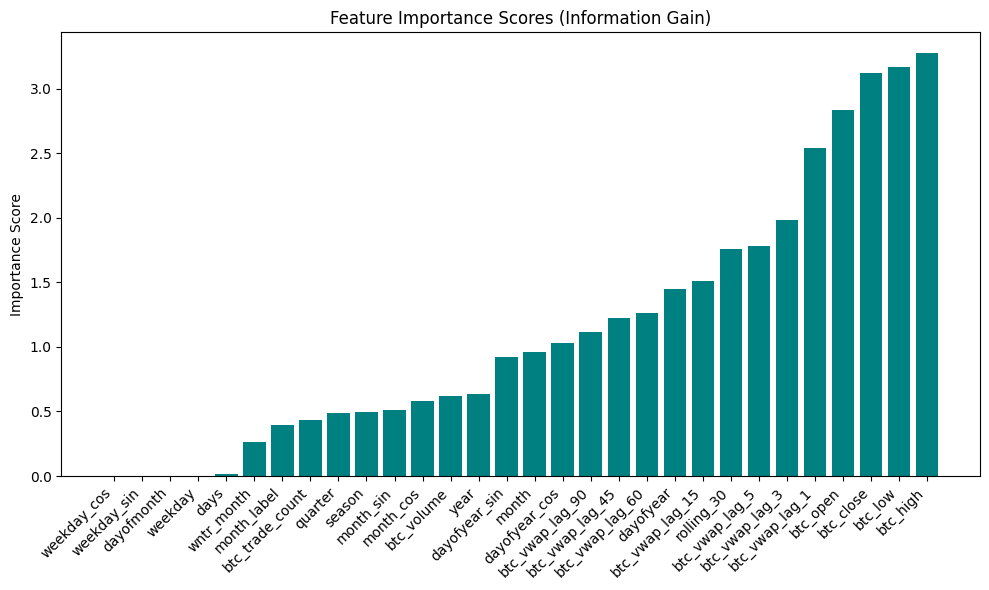

In [160]:
# Information Gain
ig = mutual_info_regression(X, y)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': ig})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Changed to ascending=True

# Print the feature importance scores and the sorted features
print(feature_importance_df)
print(len(feature_importance_df))

# Plot a vertical bar chart of the feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Feature Importance Scores (Information Gain)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


            Feature  Importance
5   btc_trade_count    0.432252
13          quarter    0.487474
14           season    0.496480
28        month_sin    0.510287
29        month_cos    0.580042
4        btc_volume    0.622353
6              year    0.637811
24    dayofyear_sin    0.921839
7             month    0.957656
25    dayofyear_cos    1.026693
23  btc_vwap_lag_90    1.112669
21  btc_vwap_lag_45    1.227847
22  btc_vwap_lag_60    1.259506
9         dayofyear    1.452112
20  btc_vwap_lag_15    1.510746
16       rolling_30    1.760243
19   btc_vwap_lag_5    1.779408
18   btc_vwap_lag_3    1.984615
17   btc_vwap_lag_1    2.542772
0          btc_open    2.838244
3         btc_close    3.125052
2           btc_low    3.167664
1          btc_high    3.273173
23


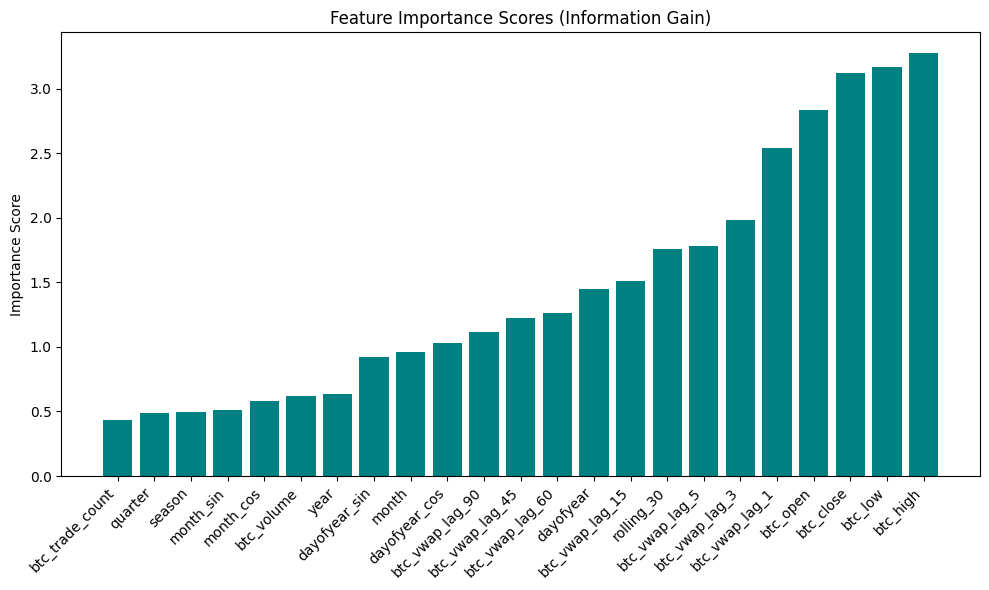

In [161]:
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] >= 0.4]
print(feature_importance_df)
print(len(feature_importance_df))
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Feature Importance Scores (Information Gain)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Fisher Score

/home/mert/.local/lib/python3.10/site-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


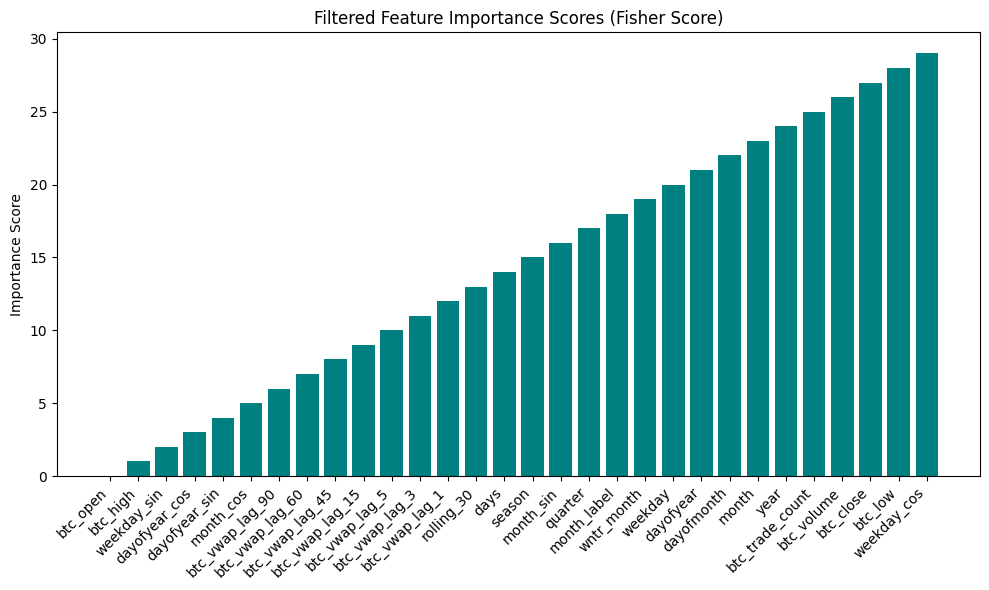

In [162]:
%matplotlib inline
X = train_data
y = target_data

# Assuming you have X and y defined earlier
X_np = np.array(X)
y_np = np.array(y)

# Calculating scores
ranks = fisher_score.fisher_score(X_np, y_np)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': ranks})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Changed to ascending=True

# print(feature_importance_df)
# print(len(feature_importance_df))
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')  # Changed to plt.bar
plt.ylabel('Importance Score')  # Changed to plt.ylabel
plt.title('Filtered Feature Importance Scores (Fisher Score)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

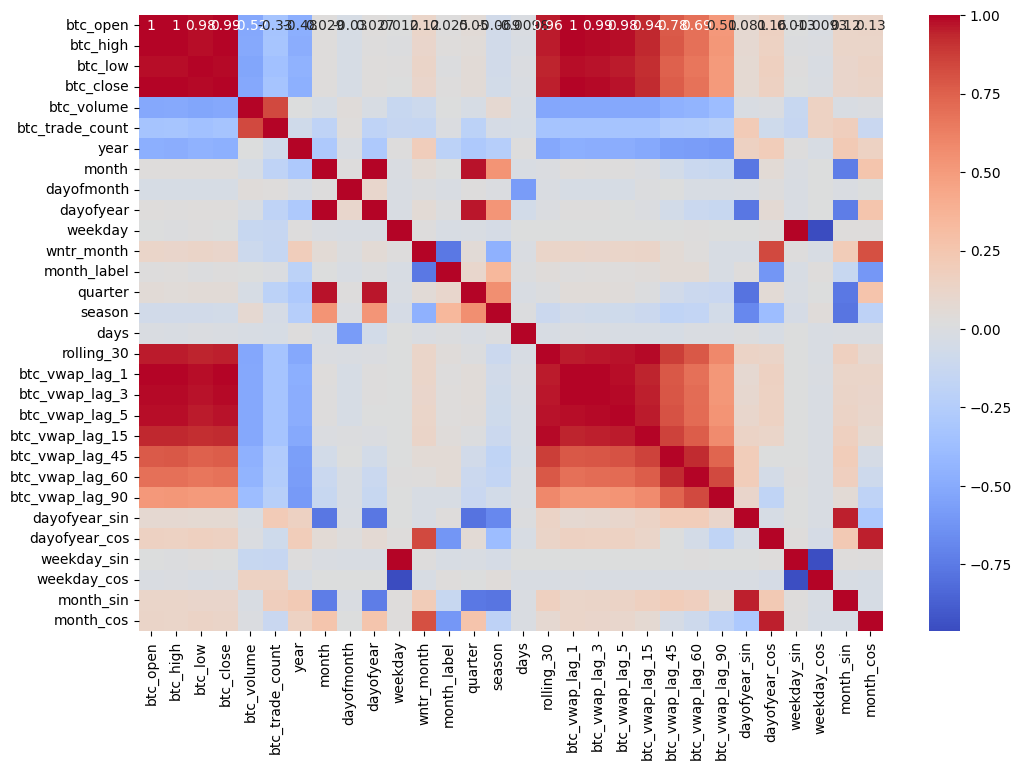

In [163]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Model Base Feature Selection

### Linear Regression

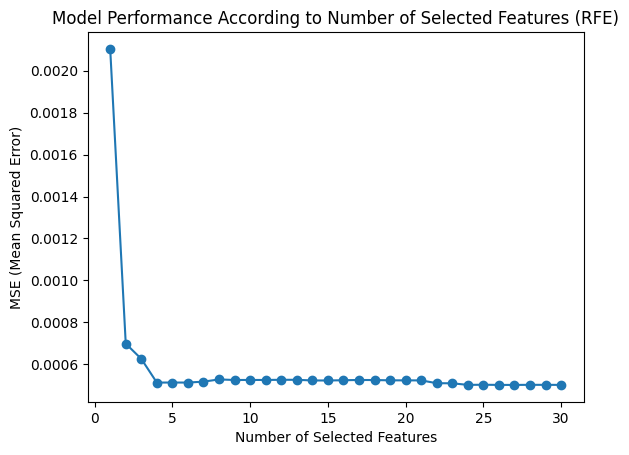

In [164]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)

# RFE için özellik sayılarını belirleyin
feature_numbers = range(1, len(X_train.columns) + 1)

mse_scores = []

# Her özellik sayısı için RFE uygulayın
for num_features in feature_numbers:
    rfe.n_features_to_select = num_features
    fit = rfe.fit(X_train, y_train)
    selected_features = X_train.columns[fit.support_]

    # Modeli seçilen özelliklerle eğitin ve test edin
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    
    # MSE hesaplayın
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Grafik oluşturun
plt.plot(feature_numbers, mse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('Model Performance According to Number of Selected Features (RFE)')
plt.show()


### Random Forest

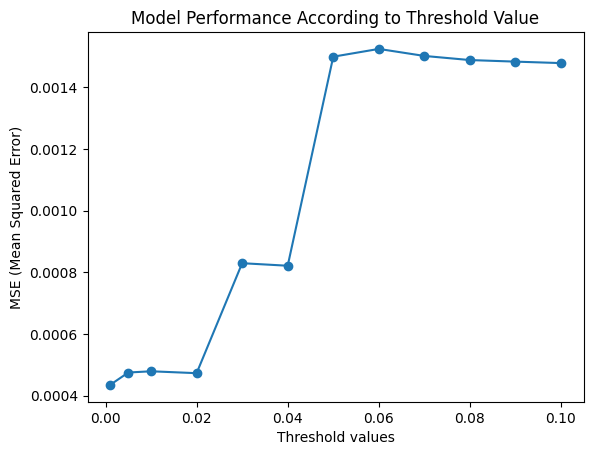

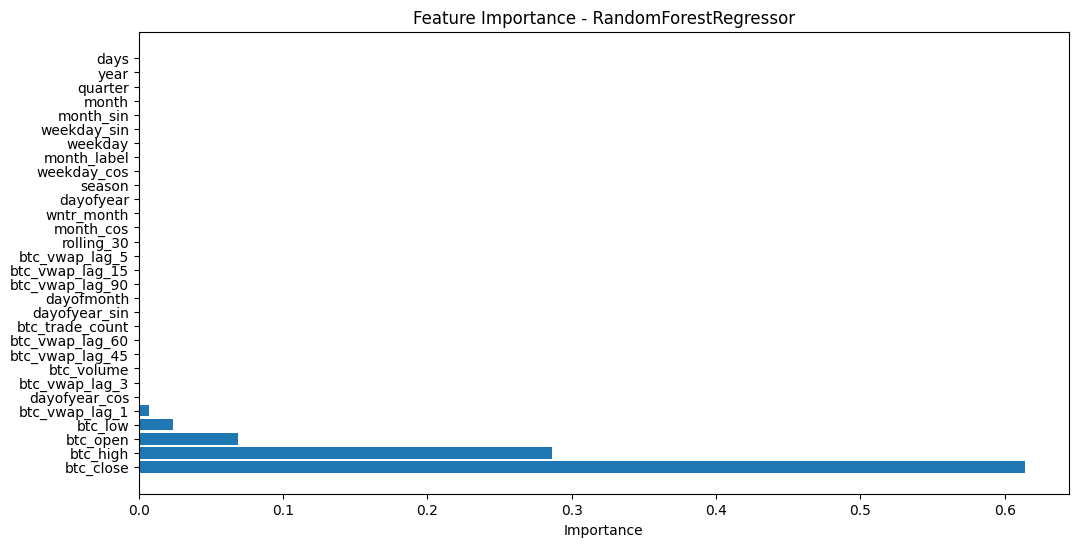

In [165]:
threshold_values = [0.001,0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

mse_scores = []

for threshold in threshold_values:

    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    selected_features = X_train.columns[model.feature_importances_ > threshold]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)


plt.plot(threshold_values, mse_scores, marker='o')
plt.xlabel('Threshold values')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('Model Performance According to Threshold Value')
plt.show()

###############################################################

model.fit(X_train, y_train)

feature_importances = model.feature_importances_

# for feature, importance in zip(X_train.columns, feature_importances):
#     print(f"{feature}: {importance}")   

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - RandomForestRegressor')
plt.show()

### Boruta Feature Selection

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	11
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	11
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	11
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	11
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	10
Rejected: 	14
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	10
Rejected: 	14
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	10
Rejected: 	14
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	10
Rejected: 	14
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	8
Rejecte

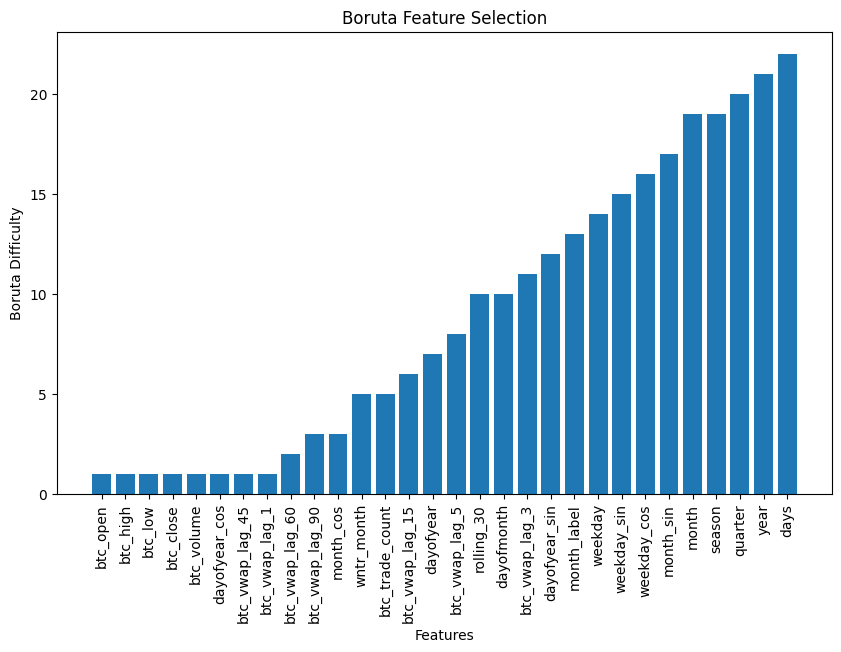

Selected Features: Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
       'btc_vwap_lag_1', 'btc_vwap_lag_45', 'dayofyear_cos'],
      dtype='object')


In [166]:
model = RandomForestRegressor()

boruta_selector = BorutaPy(model, n_estimators='auto', verbose=2)
boruta_selector.fit(X_train.values, y_train.values)

# Boruta'nın her iterasyonundaki en iyi özelliklerin zorluk değerlerini alın
feature_ranks = np.argsort(boruta_selector.ranking_)
feature_difficulty = np.sort(boruta_selector.ranking_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_difficulty)), feature_difficulty, align='center')
plt.xticks(range(len(feature_difficulty)), X_train.columns[feature_ranks], rotation=90)
plt.xlabel('Features')
plt.ylabel('Boruta Difficulty')
plt.title('Boruta Feature Selection')
plt.show()

selected_features = X_train.columns[boruta_selector.support_]
print("Selected Features:", selected_features)
